## Juego de la vida (Conway) - [TAG: gol]

<b>Deadline:</b> Friday, 1 de April de 2022, 23:59

El “juego” consiste en desarrollar un patrón de figuras que evolucionen de acuerdo a reglas predeterminadas, a partir de una configuración inicial y un conjunto de reglas.

La competencia consiste en descubrir nuevas formas originales y <u>calcular cuántas generaciones evoluciona</u> el sistema antes de que se repitan o desaparezcan. Esto se realiza en una grilla de celdas que se estira al infinito en todas las direcciones. Este efecto lo lograremos considerando que la última columna de la derecha tenga por vecina a la primera columna de la izquierda, y lo mismo con la fila de abajo y de arriba. Una celda viva se marcará con un 1 o se pintará de un color gris oscuro, mientras que una celda muerta se marcará con un 0 o se pintará con un color blanco.

Las reglas son:

1. “Una celda viviente sobrevive únicamente si tiene 2 o 3 celdas vecinas vivas”. Caso contrario, muere.
2. “El nacimiento de una nueva celda se da si esta tiene exactamente 3 celdas vivas vecinas”

Estas simples reglas tienen un potencial asombroso de generar patrones complejos, dependiendo del patrón inicial. En todo momento el programa debe mostrar la evolución de la grilla e ir mostrando el estado del sistema, es decir, la cantidad de celdas vivas y muertas, además del número de generaciones que han pasado hasta el momento. Se debe permitir el ingreso de celdas vivas en cualquier posición de la grilla antes de comenzar el juego.

La grilla por defecto deberá tener 10 x 10.

El programa se debe detener en caso de que se hayan muerto todas las celdas.

Se le debe permitir al usuario cargar el patrón inicial y lanzar la simulación para ver cómo evoluciona el modelo.

Ejemplos en:

- https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
- https://bitstorm.org/gameoflife/

<b>Entrega</b>:
La entrega deberá cumplir los siguientes requisitos:

- El código deberá ser presentado en un repositorio git
- Se creará un tag/release para la versión "estable" del programa entregable. El tag deberá ser creado antes de la fecha límite de presentación.

Además del código propiamente dicho, y convenientemente ordenado, deberá contar con los siguientes archivos en el repositorio GIT:

- <b>INSTALL.md</b>: contendrá las instrucciones para clonar e instalar/lanzar la aplicación.
- <b>README.md</b>: contendrá la ayuda y uso básico de la aplicación.
- <b>README.info</b>: contendrá un informe sobre las decisiones principales de diseñodel sistema, y su justificación (por qué usar tal o cual método, paquete, módulo, etc, y cómo se implementaron las reglas del juego de la vida.
- <b>README.todo</b>: contendrá una lista detallada de mejoras características/features del sistema para futuras correcciones y versiones.


# Resolución
Basado en el siguiente apunte: https://nostarch.com/download/samples/PythonPlayground_sampleCh3.pdf

## Paquetes que necesitamos
Es necesario que en nuestro entorno se encuentren las siguientes librerias requeridas: numpy, matplotlib, argparse, pygame.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
import sys


a = widgets.Text()
a.value = "Generations: "
b = widgets.IntText()

In [2]:
# Interactive notebook 
%matplotlib notebook
%matplotlib notebook

## Reglas
- Grilla por defecto: 10 x 10
- Evolución:
    - “Una celda viviente sobrevive únicamente si tiene 2 o 3 celdas vecinas vivas”. Caso contrario, muere.
    - “El nacimiento de una nueva celda se da si esta tiene exactamente 3 celdas vivas vecinas”
- La configuracion inicial debe ser cargada por el usuario.

## Configuración inicial

Debemos establecer el patron inicial de la grilla para ir obteniendo evoluciones del sistema y, por lo tanto, nuevas generaciones. Tenemos dos opciones: la entrada manual o la entrada aleatoria.

De cualquier forma, debemos plantear a una <b>celda viva con un 1</b> y a una <b>celda muerta con un 0</b>

In [3]:
ALIVE = 1
DEAD = 0

### Configuracion manual de la grilla

In [4]:
manual_grid = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]
base_grid = np.array(manual_grid)
base_grid

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

### Configuracion aleatoria de la grilla

Vamos a completar la grilla con celdas vivas y muertas. En este caso, la probabilidad de que aparezcan celulas vivas es mayor a la probabilidad de que aparezcan muertas: 80% para las vivas, 20% para las muertas

In [5]:
values = [ALIVE, DEAD]

# We populate the grid with random values, there will always be more alive cells than dead cells.

grid_width = 10
grid_size = grid_width * grid_width
probability = [0.2, 0.8]
base_grid = np.random.choice(values, grid_size, p=probability).reshape(grid_width, grid_width)
base_grid


array([[0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

# Las reglas de Conway

Las reglas del Juego de la Vida se basan en el número de celdas vecinas que están ALIVE o DEAD. Para simplificar la aplicación de estas reglas, puedes calcular el número total de celdas vecinas en estado ALIVE. Como los estados ALIVE tienen un valor de 1, puedes simplemente sumar los valores de todos los vecinos para obtener el número de celdas ALIVE.

- En la primer parte del codigo, cualquier celda que esté en ON se pone en OFF si tiene menos de dos vecinos que estén en ON o si tiene más de tres vecinos que estén en ON. 
- La segunda parte del codigo se aplica sólo a las celdas OFF: una celda se pone en ON si exactamente tres vecinos están en ON.

In [6]:
def update(_, img, grid, N):
    # Generate a new grid to mutate copying the original
    new_grid = grid.copy()
    for i in range(N):
        for j in range(N):
            # 8-neighbor sum: how many alive neighbours are there?
            # Toroidal boundary conditions - x and y wrap around so that the simulaton takes place on a toroidal surface.
            alive_cells_num = int((grid[i, (j - 1) % N] + grid[i, (j + 1) % N] +
                         grid[(i - 1) % N, j] + grid[(i + 1) % N, j] +
                         grid[(i - 1) % N, (j - 1) % N] + grid[(i - 1) % N, (j + 1) % N] +
                         grid[(i + 1) % N, (j - 1) % N] + grid[(i + 1) % N, (j + 1) % N]))

            # apply Conway's rules
            # "A living cell survives only if it has 2 or 3 living neighboring cells. Otherwise, it dies."            
            if grid[i, j] == ALIVE:
                if (alive_cells_num < 2) or (alive_cells_num > 3):
                    new_grid[i, j] = DEAD
            # "The birth of a new cell occurs if it has exactly 3 neighboring living cells."
            else:
                if alive_cells_num == 3:
                    new_grid[i, j] = ALIVE


    if not np.array_equal(grid, new_grid):
        # Generate another graph and the new grid in the origina variable
        img.set_data(new_grid)
        grid[:] = new_grid[:]
        # Increment Generations value
        b.value += 1
    else:
        sys.exit(0)

    if np.count_nonzero(grid) == 0:
        sys.exit(0)

    return img,


<IPython.core.display.Javascript object>


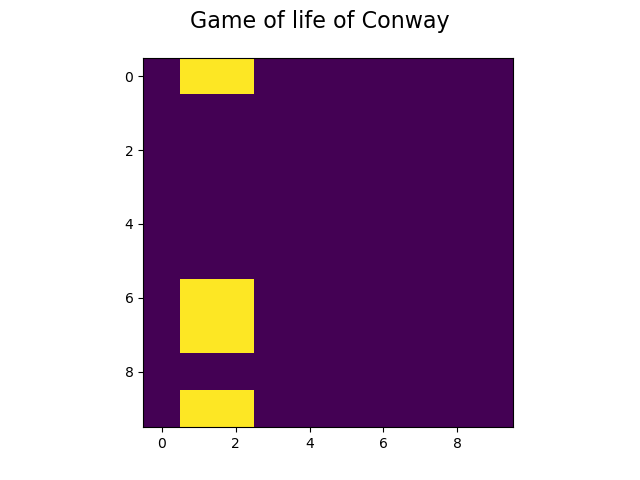

Text(value='Generations: ')

IntText(value=0)

In [7]:
from IPython.core.display_functions import display

# set up animation
fig, ax = plt.subplots()
fig.suptitle('Game of life of Conway', fontsize=16)
img = ax.imshow(base_grid, interpolation='nearest')
ani = animation.FuncAnimation(fig, update, fargs=(img, base_grid, grid_width,),
                              frames=10,
                              interval=50,
                              save_count=50)

display(a,b)